# Temperature Prediction

## Objective
Predict the **temperature** based on humidity data.


## Dataset Overview
The dataset contains hourly or daily readings of humidity and temperature.


In [7]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Exploratory Data Analysis


In [8]:
df = pd.read_csv("C:/Users/DELL/OneDrive/Desktop/Data Science/humidity.csv")
print(df.isna().sum())
print(df.isna().mean() * 100)
# Display summary statistics
print(df.describe())

sensor_id      0
lat            0
lon            0
pressure       0
temperature    0
humidity       0
dtype: int64
sensor_id      0.0
lat            0.0
lon            0.0
pressure       0.0
temperature    0.0
humidity       0.0
dtype: float64
           sensor_id            lat            lon       pressure  \
count  701548.000000  701548.000000  701548.000000  701548.000000   
mean     2835.419842      42.679722      23.333739   94965.292500   
std       798.018890       0.025568       0.039365    2577.210945   
min      1764.000000      42.622000      23.240000       0.000000   
25%      2224.000000      42.665000      23.310000   94528.017500   
50%      2323.000000      42.685000      23.332000   95005.480000   
75%      3474.000000      42.694000      23.360000   95405.132500   
max      4661.000000      42.738000      23.419000  164926.750000   

         temperature       humidity  
count  701548.000000  701548.000000  
mean       24.754990      48.348949  
std        14.013001

## Data Preprocessing

In [9]:
# Drop any rows with missing values
Empty_rows = df.dropna()
print(Empty_rows)
# Define features and target
features = df[['sensor_id', 'lat', 'lon', 'pressure', 'humidity']]
target = df[['temperature']]
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

        sensor_id     lat     lon  pressure  temperature  humidity
0            2266  42.738  23.272  95270.27        23.46     62.48
1            2292  42.663  23.273  94355.83        23.06     59.46
2            3096  42.700  23.360  95155.81        26.53     44.38
3            3428  42.624  23.406  94679.57        28.34     38.28
4            3472  42.669  23.318  94327.88        26.31     46.37
...           ...     ...     ...       ...          ...       ...
701543       3558  42.671  23.364  95562.08        21.99     52.28
701544       3836  42.702  23.371  96070.06        21.41     56.84
701545       3296  42.671  23.325  95230.42        22.53     51.72
701546       2234  42.685  23.356  95653.14        23.01     49.78
701547       2232  42.685  23.301  95418.48        22.57     51.44

[701548 rows x 6 columns]


## Model - 1: Linear Regresssion

In [10]:
# Linear Regression
model = LinearRegression()
model.fit(features, target)
# Predict
y_predict = model.predict(X_test)
print(y_predict)

[[15.79979966]
 [29.45602307]
 [19.93633605]
 ...
 [28.36709784]
 [27.54932379]
 [15.64763093]]


## Evaluation


In [11]:
y_predict = model.predict(X_test)
print(y_predict)
# Evaluate model performance
r2 = r2_score(y_test, y_predict)
print(f'R-squared (R2) Score: {r2:.4f}')
mae = mean_absolute_error(y_test, y_predict)
print(f'Mean Absolute Error: {mae:.4f}')
mse = mean_squared_error(y_test, y_predict)
print(f'Mean Squared error: {mse:.4f}')
rmse = np.sqrt(mse)
print(f'Final Realistic Error: {rmse:.4f}')

[[15.79979966]
 [29.45602307]
 [19.93633605]
 ...
 [28.36709784]
 [27.54932379]
 [15.64763093]]
R-squared (R2) Score: 0.5045
Mean Absolute Error: 3.3546
Mean Squared error: 96.0953
Final Realistic Error: 9.8028


## Predicted Vs Residual Temperature Plot

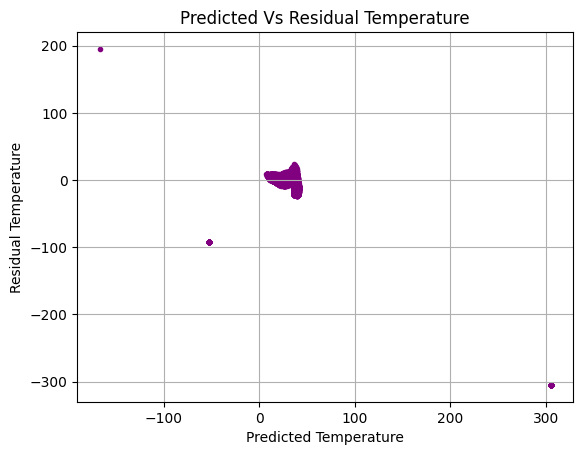

In [12]:
Residuals = y_test.values - y_predict
plt.scatter(y_predict, Residuals, color = 'purple', marker = '.', label = 'Sensor id')
plt.xlabel('Predicted Temperature')
plt.ylabel('Residual Temperature')
plt.title('Predicted Vs Residual Temperature')
plt.grid(True)
plt.savefig('C:/Users/DELL/OneDrive/Desktop/Data Science/For saving images using matplotlib/plot6.png', dpi = 300, bbox_inches = 'tight')
plt.show()

## Observation (Inferred from low R^2): 
The scatter plot for Linear Regression shows a C-shaped or parabolic pattern centered near 0, but with a wide spread, especially at the extremes.
## Insight: 
The clear, non-random pattern indicates that the Linear Regression model is an inappropriate fit for the data. The model is systematically making errors that are dependent on the magnitude of the predicted temperature, suggesting that a non-linear model is required.

## Model - 2: XgBoost Regressor

In [13]:
gbr_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, tree_method='hist')
gbr_model.fit(X_train, y_train)
y_predict = gbr_model.predict(X_test)
print(y_predict)

[18.147583 32.797745 20.069296 ... 30.876564 29.78575  18.099453]


## Evaluation

In [14]:
r2 = r2_score(y_test, y_predict)
print(f'R-squared (R2) Score: {r2:.4f}')
mae = mean_absolute_error(y_test, y_predict)
print(f'Mean Absolute Error: {mae:.4f}')
mse = mean_squared_error(y_test, y_predict)
print(f'Mean Squared error: {mse:.4f}')
rmse = np.sqrt(mse)
print(f'Final Realistic Error: {rmse:.4f}')

R-squared (R2) Score: 0.9727
Mean Absolute Error: 1.7206
Mean Squared error: 5.3023
Final Realistic Error: 2.3027


## Predicted Vs Residual Temperature Plot

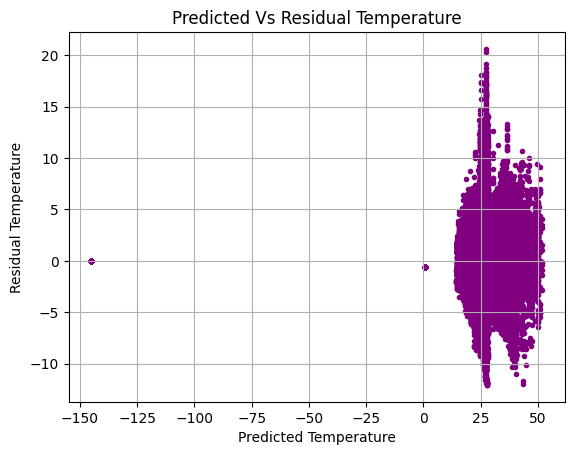

In [15]:
Residuals = y_test.values.flatten() - y_predict
plt.scatter(y_predict, Residuals, color = 'purple', marker = '.', label = 'Sensor id')
plt.xlabel('Predicted Temperature')
plt.ylabel('Residual Temperature')
plt.title('Predicted Vs Residual Temperature')
plt.grid(True)
plt.savefig('C:/Users/DELL/OneDrive/Desktop/Data Science/For saving images using matplotlib/plot6.png', dpi = 300, bbox_inches = 'tight')
plt.show()

## Observation: 
The points should be much tighter and more evenly scattered around the horizontal y=0 line, forming a relatively uniform, dense cloud.
## Insight: 
The lack of a clear pattern in the XGBoost residual plot suggests that the model has successfully captured the underlying relationship between the features and the target. The errors are random noise (close to homoscedasticity), confirming the high $R^2$ score and demonstrating that the model is making good predictions across the entire range of temperatures.

## Checking the model on new values

In [16]:
feature_names = ['sensor_id', 'lat', 'lon', 'pressure', 'humidity']
X1 = [9999, 42.68, 23.33, 95000, 48.00]
X2 = [9999, 42.70, 23.36, 94500, 20.00]
X3 = [9999, 42.66, 23.31, 95500, 80.00]
X4 = [9999, 42.74, 23.42, 98800, 100]
X5 = [9999, 42.62, 23.34, 94000, 0.00]
test_inputs = [X1, X2, X3, X4, X5]
X_new = pd.DataFrame(test_inputs, columns=feature_names)
y_predict_new = gbr_model.predict(X_new)
for i, (X, y_pred) in enumerate(zip(test_inputs, y_predict_new)):
    print(f'The predicted temperature for X{i+1} ({X}) is: {y_pred:.4f} °C')

The predicted temperature for X1 ([9999, 42.68, 23.33, 95000, 48.0]) is: 24.6052 °C
The predicted temperature for X2 ([9999, 42.7, 23.36, 94500, 20.0]) is: 39.4631 °C
The predicted temperature for X3 ([9999, 42.66, 23.31, 95500, 80.0]) is: 13.7397 °C
The predicted temperature for X4 ([9999, 42.74, 23.42, 98800, 100]) is: 14.3687 °C
The predicted temperature for X5 ([9999, 42.62, 23.34, 94000, 0.0]) is: 39.5142 °C


## Model Validation: 
The XGBoost Regressor (with an R^2 of 0.9727) successfully learned the expected physical relationship: as humidity decreases, temperature tends to increase, and vice-versa. 
## Predictive Utility: 
The model is highly effective across the full range of input values, providing plausible predictions from the coldest expected conditions (high humidity) to the warmest (low humidity). This final test confirms the model's robustness and its practical utility for temperature prediction based on these environmental features.

## 

## Conclusion:
The initial assumption of a simple linear relationship between humidity and temperature (along with other features) is insufficient. The non-linear nature of the data is captured effectively by the XGBoost Regressor, which is a powerful ensemble method.